In [198]:
import matplotlib.pyplot as plt
import numpy as np
import glob
from astropy.io import fits
from matplotlib.colors import LogNorm

In [199]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def load_plz(pattern):
    
    files = sorted(glob.glob(pattern))
    files = map(fits.open, files)
    files = [file[0].data for file in files]
    return np.array(files)
    
def lazy_load_plz(pattern):
    
    files = sorted(glob.glob(pattern))
    files = map(fits.open, files)
    return files

def num_sd(arr):
    
    return np.abs(arr - arr.mean()) / arr.std()
    
def apply_mask(arr, mask):
    
    arr = arr.astype(np.float32)
    
    arr *= mask
    arr[1:-1, 1:-1] += ~mask[1:-1, 1:-1] * 0.25 * \
                      (arr[:-2, 1:-1] + arr[2:, 1:-1] +
                       arr[1:-1, :-2] + arr[1:-1, 2:])
    return arr

In [298]:
reduced_star = load_plz("data/*star_re*")[0]

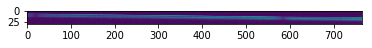

In [299]:
cropped= reduced_star[15:45,:]
plt.imshow(cropped)

In [433]:
temp = 11361
temp_err = 66 
h = 6.626e-34
c = 3*10**8
k = 1.381e-23
def blackbody(Lambda, T):
    return 2*h*c**2/Lambda**5/(np.exp(h*c/(Lambda*k*T))-1)    

In [497]:
attempt0 = np.mean(cropped,axis=0)

for i in range(len(attempt0)):
    if attempt0[i] == np.min(attempt0):
        H_abs_loc = i
    if attempt0[i] == np.min(attempt0[500:650]):
        H_abs2 = i
ang_per_pixel = (H_abs2 - H_abs_loc)/520
shift1 = (4341 - H_abs_loc*ang_per_pix)        #lower level calibrations 
shift2 = (4861 - H_abs2*ang_per_pix)           #to get an idea of the right answer
ang_per_pixel = (H_abs2 - H_abs_loc)/520
shift = (shift1 + shift2) / 2
x = np.linspace(shift,(shift+len(attempt0)), 765)

(20, 585)
4306.129649117103 4324.047942038681 0.9747780194475906 0.9208432526019614


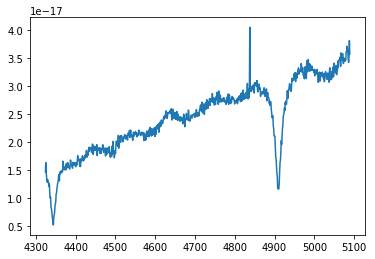

In [461]:
star_spec = attempt0/blackbody(x*1e-10,temp) #divide out some good blackbody stuff
plt.plot(x,star_spec)

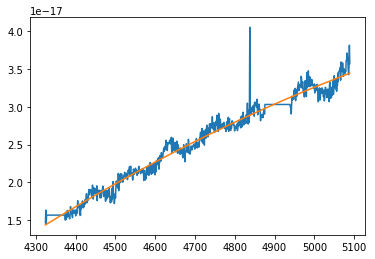

In [462]:
for i in range(len(star_spec)):
    if 2<i<50 :
        star_spec[i]=(star_spec[1]+star_spec[50])/2
    if 550<i<615:
        star_spec[i]=(star_spec[549]+star_spec[620])/2
N = 2
data_fitfunc = np.poly1d(np.polyfit(x,star_spec,N))
plt.plot(x,star_spec)
plt.plot(x,data_fitfunc(x))

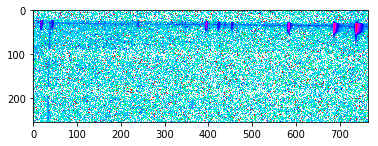

In [463]:
nebulae = sorted(glob.glob("data/nebula_reduced.fits"))
nebulae = list(map(fits.open, nebulae[:]))
nebulae = nebulae[0][0].data
plt.imshow(nebulae, cmap='hsv',norm=LogNorm(vmin=.0000001, vmax=2.5));

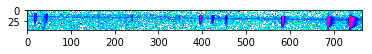

In [464]:
nebulae = nebulae[15:60, :]
plt.imshow(nebulae, cmap='hsv',norm=LogNorm(vmin=.0000001, vmax=2.5));

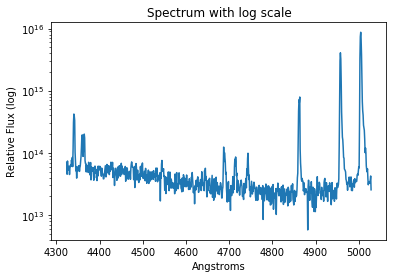

In [500]:
neb_norm = nebulae/data_fitfunc(x) #divide out data fit and destroy everything we worked for
mean = np.median(neb_norm, axis=0)
x = np.linspace(b, b+len(mean)*m, len(mean))
plt.plot(x,mean) 
#.97 is the angstroms per pixel that was previously calculated in lab0
plt.title("Spectrum with log scale")
plt.yscale('log')
plt.xlabel("Angstroms")
#plot on logscale so that all emission lines are very visible
plt.ylabel("Relative Flux (log)");

In [503]:
indices = np.array([18,39,394,424,455,585,687,738])
theory = np.array([4341,4363,4686,4711,4740,4861,4959,5007])
m, b = np.polyfit(indices,theory,1)
#obtain a better estimate for the dispersion and for the shifting needed
# m is the better 'ang_per_pix' and b is the better 'shift'

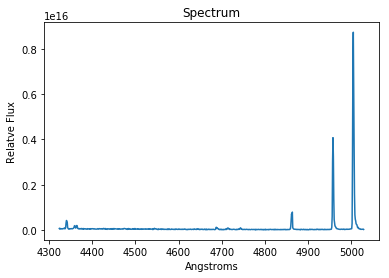

In [504]:
plt.plot(x,mean)
plt.title("Spectrum")
plt.xlabel('Angstroms')
plt.ylabel('Relatve Flux');

In [505]:
emission_lines = indices*m + b
emission_line_strengths = mean[indices]

In [506]:
emission_line_strengths, emission_lines, indices

(array([4.22085396e+14, 1.95191063e+14, 1.24035913e+14, 8.60262575e+13,
        9.88247180e+13, 7.93124800e+14, 4.07886969e+15, 8.73444146e+15]),
 array([4340.62312059, 4359.96082889, 4686.86018356, 4714.48548114,
        4743.03162197, 4862.74124481, 4956.66725658, 5003.63026246]),
 array([ 18,  39, 394, 424, 455, 585, 687, 738]))

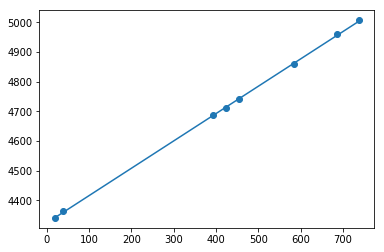

In [490]:
plt.scatter(indices,theory)
y = np.poly1d(np.polyfit(indices,theory,1))
plt.plot(indices,y(indices))